In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd
from scipy.stats import linregress


15372
8385
1355


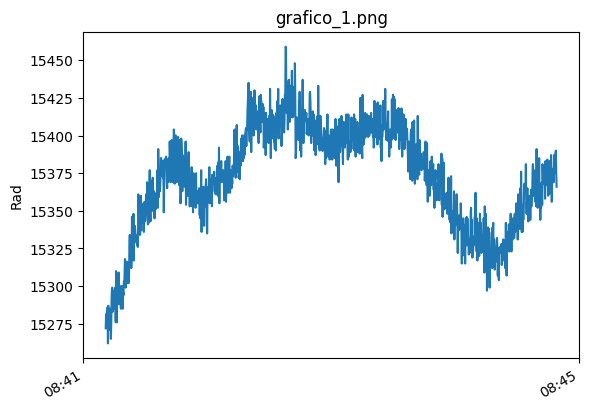

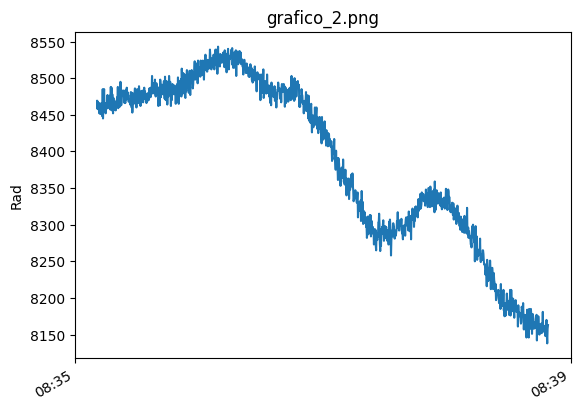

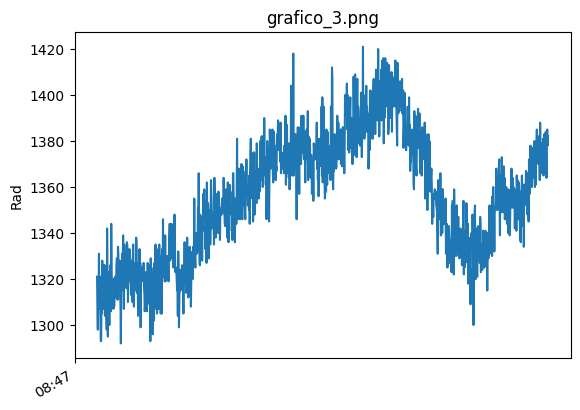

In [2]:
files_calibrazione = np.array(['dati/cal_g5_z6877_amb.txt', 'dati/Cal_G5_Z8900_amb.txt', 'dati/Cal_G5_z10923_amb.txt'])

titolo_grafici = np.array(['grafico_1.png', 'grafico_2.png', 'grafico_3.png'])
media = np.array ([0,0,0])

for i in range(0,3):
    calibrazione_1 = pd.read_csv (files_calibrazione[i],
                                    sep = ' ',
                                    header=None,
                                    skiprows=10,
                                    decimal='.',
                                    names=['data','ora','rad','temperatura'])
    
    calibrazione_1['data_ora'] = calibrazione_1['data'].map(str) + ' ' + calibrazione_1['ora'].map(str)
    calibrazione_1['data_ora'] = pd.to_datetime(calibrazione_1['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
    calibrazione_1 = calibrazione_1.iloc[:,[-1,2,3]]
    
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    ax.plot(calibrazione_1['data_ora'],calibrazione_1['rad'], label='temp')
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

    plt.title(titolo_grafici[i])
    plt.ylabel('Rad')

    plt.savefig(titolo_grafici[i])
    
    media[i] = calibrazione_1.rad.mean()
    print(media[i])

In [3]:
print(media)

[15372  8385  1355]


Text(0.5, 0, 'offset')

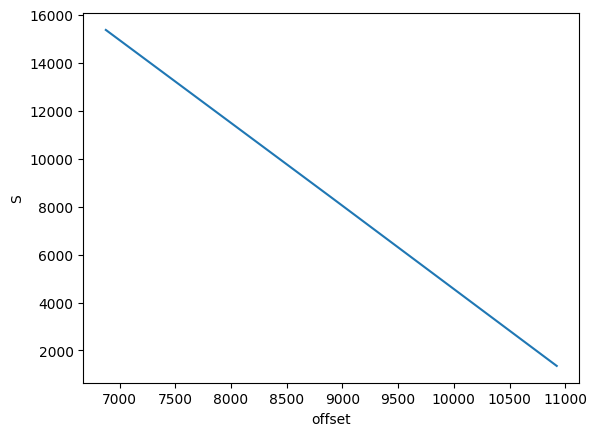

In [4]:
zero_base = np.array([6877, 8900, 10923])

plt.plot(zero_base, media)
plt.ylabel('S')
plt.xlabel('offset')


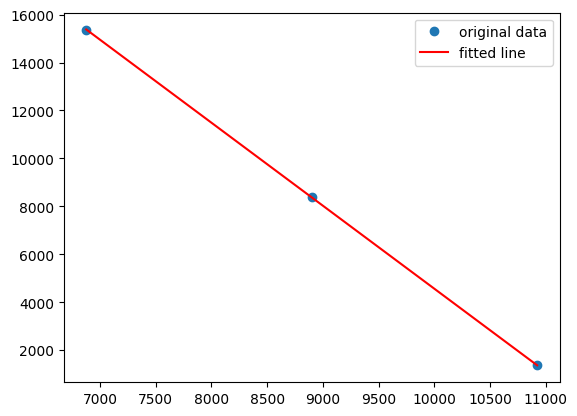

In [5]:
res = linregress(zero_base,media) #x and y are arrays or lists.

plt.plot(zero_base, media, 'o', label='original data')
plt.plot(zero_base, res.intercept + res.slope*(zero_base), 'r', label='fitted line')
plt.legend()
plt.show()

In [25]:
res.slope

-3.464409293129016

Ricavo temperatura ambiente da sensore

In [14]:
parabola = pd.read_csv('../dati/TDA2023_04_18.txt' , sep=';', header=None, comment = '#')

In [15]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3:'hour', 4: 'minute', 5:'second', 45: 'T_1', 46: 'T_2', 47: 'T_3', 48: 'T_4'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[['day','month','year','hour','minute','second']])
parabola = parabola.loc[:, ['data_ora','T_1','T_2','T_3','T_4']]

In [16]:
parabola

,data_ora,T_1,T_2,T_3,T_4
0,2023-04-18 00:00:02,19.1,18.5,18.5,45.2
1,2023-04-18 00:00:05,18.1,18.7,18.0,45.2
2,2023-04-18 00:00:08,18.5,18.7,18.1,45.2
3,2023-04-18 00:00:11,19.4,18.4,17.9,45.2
4,2023-04-18 00:00:14,19.2,18.4,18.7,45.2
...,...,...,...,...,...
28795,2023-04-18 23:59:47,19.6,20.4,19.2,45.2
28796,2023-04-18 23:59:50,20.3,19.9,20.0,45.2
28797,2023-04-18 23:59:53,19.5,19.5,19.6,45.2
28798,2023-04-18 23:59:56,19.5,20.4,19.8,45.2


In [17]:
mask_1 = parabola.data_ora >= '2023-04-18 08:54:00'
mask_2 = parabola.data_ora <= '2023-04-18 09:11:00'

parabola = parabola.loc[mask_1 & mask_2]

In [19]:
media_1 = parabola.T_1.mean()
media_2 = parabola.T_2.mean()
media_3 = parabola.T_3.mean()

In [20]:
media_1

20.18558823529412

In [21]:
media_2

20.546470588235294

In [22]:
media_3

20.83823529411765

In [23]:
media_temperatura_amb = (media_1 + media_2 + media_3)/3

In [24]:
media_temperatura_amb

20.523431372549023